# Работа с вэйвлетами

In [1]:
import numpy as np
import numpy.random

In [2]:
s = np.array([1,2,3,4,5,6,7,8])
h_a = np.array([0.5, 0.5])
g_a = np.array([-0.5,0.5])
h_s = np.array([1,1])
g_s = np.array([1,-1])
s

array([1, 2, 3, 4, 5, 6, 7, 8])

In [404]:
def down_2(signal):
    return signal[::2]
def up_2(signal):
    res = np.array([signal[x//2] if x % 2 == 0 else 0 for x in range(signal.shape[0]*2)])
    return res
def convolve(signal,filtr):
    return np.convolve(signal,filtr)[1:]
def convolve_2(signal,filtr):
    return np.convolve(signal,filtr)[:-1]

In [405]:
def haar_transform(s):
    v = [s]
    w = [s]
    while(len(v[-1]) != 1):
        v.append(down_2(convolve(v[-1],h_a)))
        w.append(down_2(convolve(w[-1],g_a)))
    w.reverse()
    v.reverse()
    return v[:-1],w[:-1]

In [406]:
v, w = haar_transform(s)

In [407]:
def inverse_haar_transform(v,w):
    res = [v[0]]
    for v_,w_ in zip(v,w):
        res.append(convolve2(up_2(v_),h_s) + convolve2(up_2(w_),g_s))
    return res

In [408]:
inverse_haar_transform(v,w)

[array([ 4.5]),
 array([ 4.5,  4.5]),
 array([ 2.5,  2.5,  6.5,  6.5]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])]

In [3]:
import pywt

In [410]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [411]:
print pywt.Modes.modes

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect']


In [412]:
cA, cD = pywt.dwt(s,'haar')

In [413]:
cA

array([  2.12132034,   4.94974747,   7.77817459,  10.60660172])

In [415]:
cD

array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])

In [417]:
pywt.idwt(cA,cD,'haar')

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [476]:
haar = pywt.DiscreteContinuousWavelet('haar')
pywt.wavedec(s,haar)

[array([ 12.72792206]),
 array([-5.65685425]),
 array([-2., -2.]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

In [454]:
pywt.dwt(s,'haar')

(array([  2.12132034,   4.94974747,   7.77817459,  10.60660172]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678]))

In [482]:
pywt.downcoef('d',s,haar,level=1)

array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])

In [489]:
pywt.dwt_max_level(1024,2)

10

In [490]:
coeffs = pywt.wavedec([1,2,3,4,5,6,7,8], 'db1', level=2)
pywt.waverec(coeffs, 'db1')

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

## Изображения и вэйвлеты

In [620]:
import scipy.misc
%matplotlib inline
import matplotlib.pyplot as plt
image = scipy.misc.imread("image.jpg",mode='L')


In [621]:
coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs
scipy.misc.imshow(image)
scaled_image = np.vstack([np.hstack([cA, cH]), np.hstack([cV, cD])])

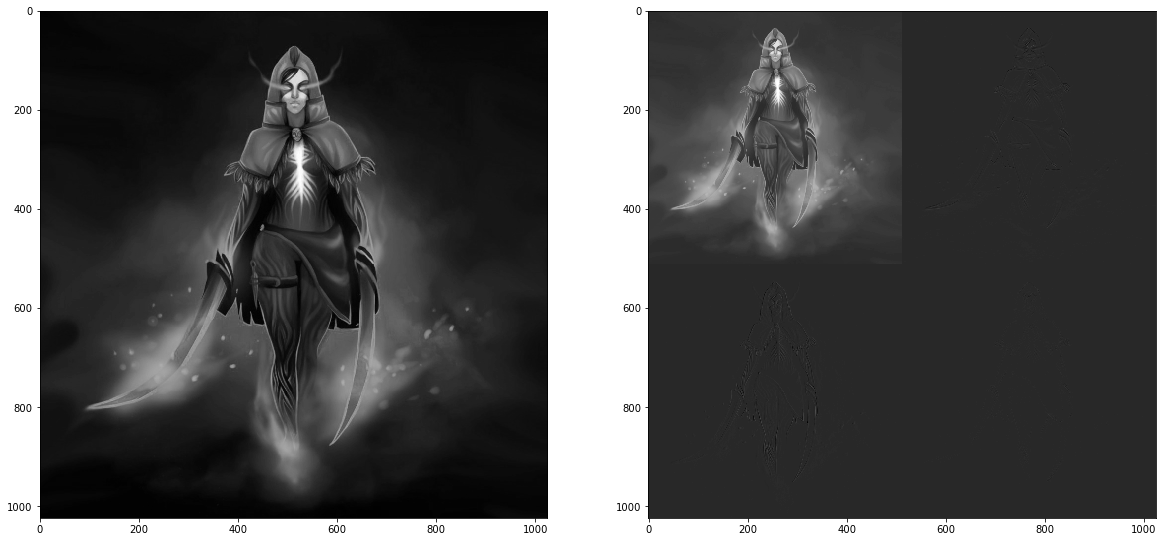

In [622]:
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].imshow(image, cmap="gray")
axarr[1].imshow(scaled_image, cmap="gray")

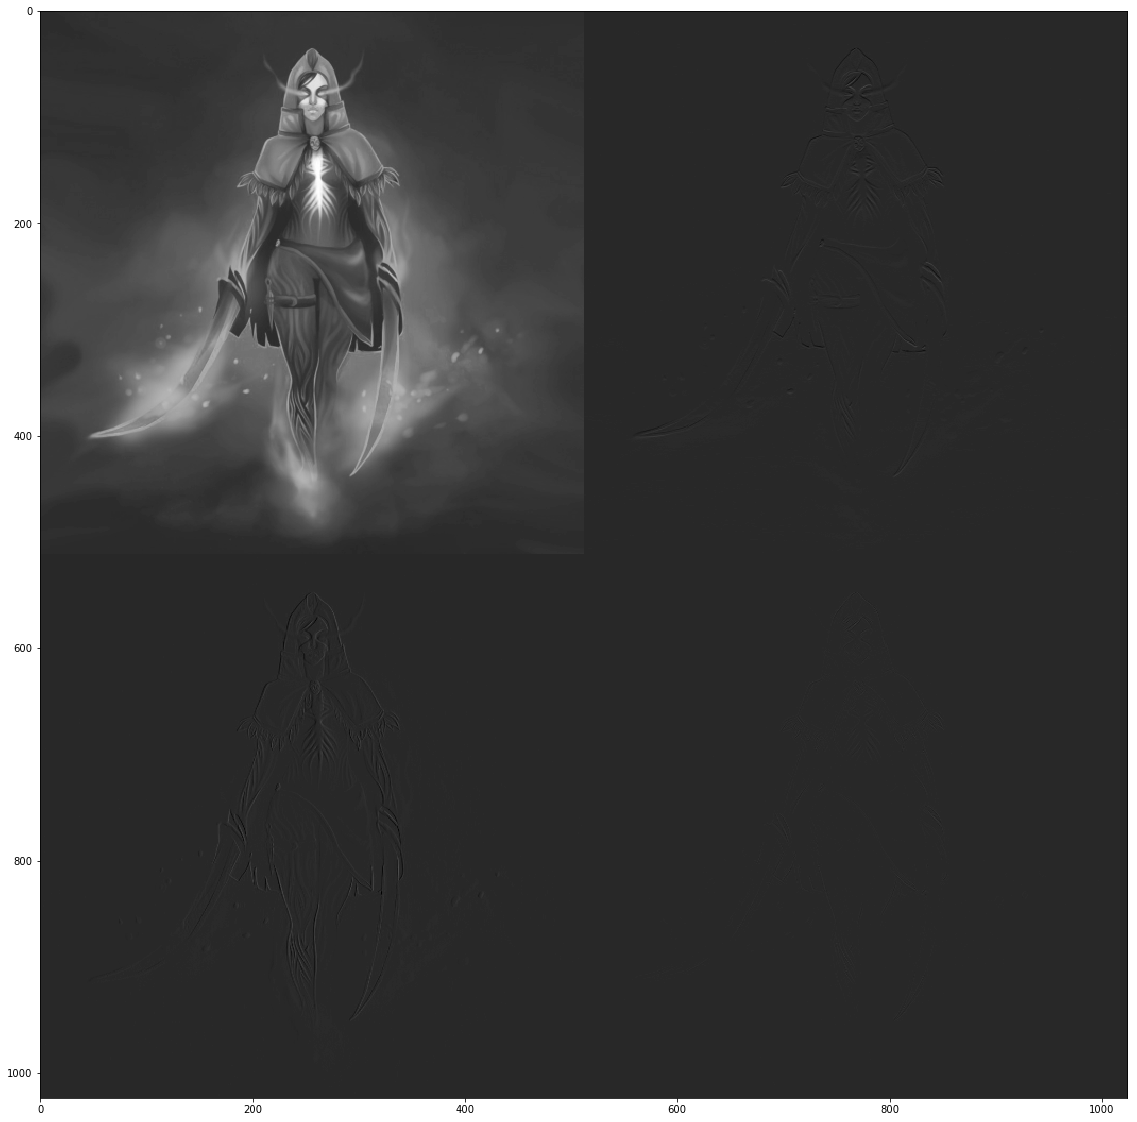

In [623]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(scaled_image, cmap="gray")

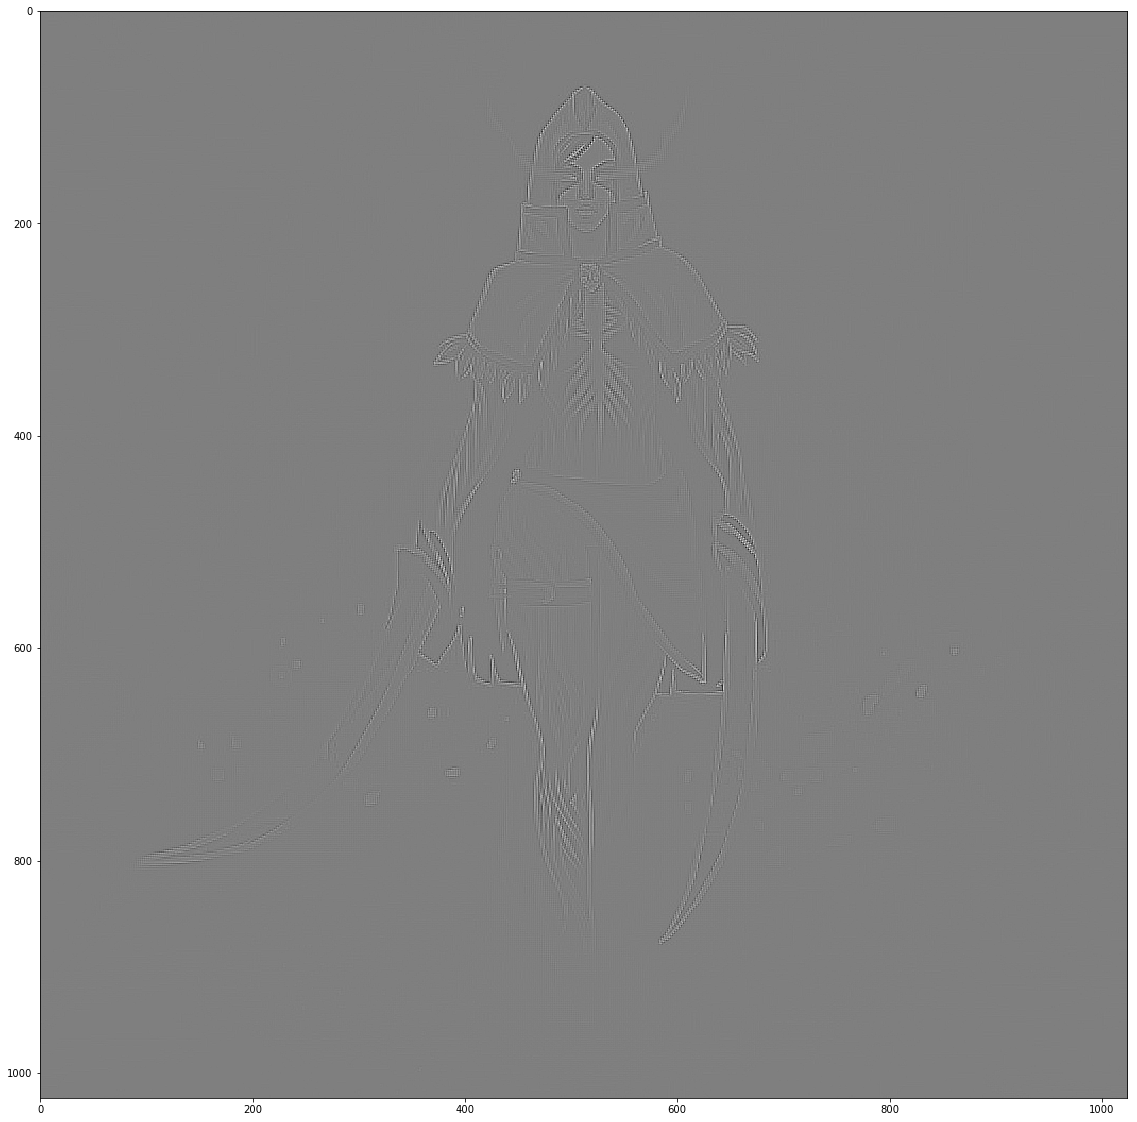

In [640]:
threshold = 1000
coeffs = pywt.dwt2(image, 'haar')
coeffs[0][np.abs(coeffs[0]) < threshold] = 0 
thresholded_image = pywt.idwt2(coeffs,'haar')
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(thresholded_image, cmap="gray")


In [4]:
s = [1,-1,0,0]
cA, cD = pywt.dwt(s,'haar')
print(cA, cD)

[ 0.  0.] [ 1.41421356  0.        ]


In [5]:
pywt.idwt(cA,cD,'haar')

array([ 1., -1.,  0.,  0.])

In [6]:
s = np.array([[1,0,1,0],[1,1,1,1],[1,2,1,2],[-1,-1,-1,1]])

In [7]:
coeffs = pywt.dwt2(s, 'haar')

In [11]:
pywt.dwt2(coeffs[0], 'haar')[0]

array([[ 2.5]])

In [12]:
2.5*4


10.0